In [387]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


In [388]:
# Read the dataset
df = pd.read_csv('df_provincie_06_22_bar.csv')

In [389]:
# I filtered data for the province of Nuoro
nuoro = df[df['Territorio'].isin(['Nuoro'])]
nuoro.drop(columns = ['Unnamed: 0', 'id'], axis = 1, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='Anno', ylabel='Quintali'>

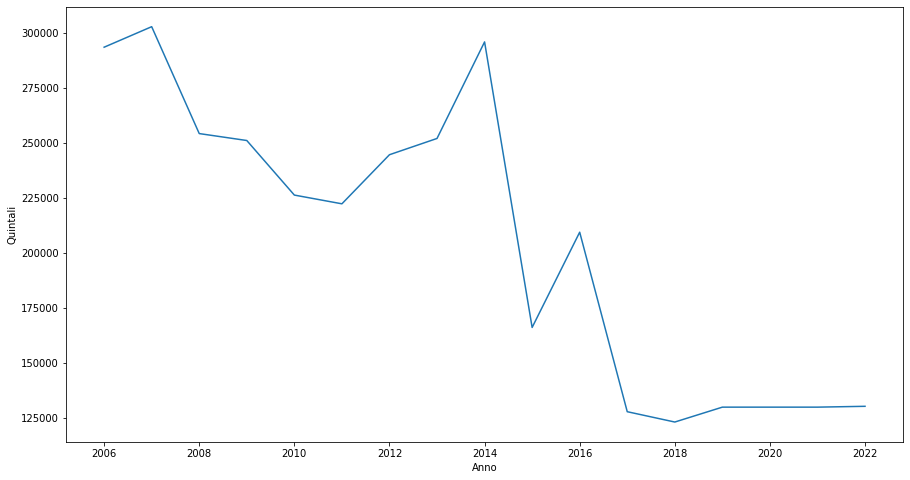

In [390]:
# visualize the data with Seaborn

plt.figure(figsize =(15,8))
sns.lineplot(data = nuoro, x = 'Anno', y = 'Quintali')

In [391]:
#visualize the data with Plotly

import plotly.express as px


fig = px.line( nuoro,
              x = 'Anno',
              y = 'Quintali',
              hover_data = ['Classifica', 'Var.%'],
              width = 1000,
              title = 'Nuoro Trend (2006 - 2022)')

fig.show()

In [392]:
# vectorize the 'Nuoro' column
preprocessor = ColumnTransformer(transformers = [('cat', OneHotEncoder(sparse = True), ['Territorio']),
                                                 ],
                                 remainder = 'passthrough')

nuoro_transformed = preprocessor.fit_transform(nuoro)
nuoro_transformed.shape

(17, 5)

In [393]:
# transform the vectorized dataframe into a pandas dataframe

X_dataframe = pd.DataFrame(nuoro_transformed)
X_dataframe

,0,1,2,3,4
0,1.0,2006.0,293550.0,0.00,51.0
1,1.0,2007.0,302887.0,3.18,49.0
2,1.0,2008.0,254254.0,-16.06,51.0
3,1.0,2009.0,251100.0,-1.24,50.0
4,1.0,2010.0,226272.0,-9.89,55.0
5,1.0,2011.0,222296.0,-1.76,53.0
6,1.0,2012.0,244631.0,10.05,50.0
7,1.0,2013.0,252032.0,3.03,51.0
8,1.0,2014.0,295962.0,17.43,46.0
9,1.0,2015.0,166039.0,-43.90,60.0


In [394]:
#remove the target column from the dataframe

y = X_dataframe[2]
X_dataframe = X_dataframe[[0,1,3,4]]

In [395]:
# initialize the variable X for the train test split

X = X_dataframe

In [396]:
#split the dataset into 4 parts: 2 for training and 2 for testing
# the test data will correspond to 20% of the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [397]:
# initialize the linear regression model from sklearn.linear_model
# train the model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [398]:
# make predictions and look at the 'Mean absolute error' MAE

p_train = model.predict(X_train)
p_test = model.predict(X_test)

mae_train = mean_absolute_error(y_train, p_train)
mae_test = mean_absolute_error(y_test, p_test)

print(f'MAE Train = {mae_train}, MAE Test = {mae_test}')

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print(f'Il modello di train ha una precisione del : {score_train}')
print(f'Il modello di test ha una precisione del {score_test}')      

MAE Train = 7532.355686332529, MAE Test = 17553.196971187834
Il modello di train ha una precisione del : 0.9758226071159145
Il modello di test ha una precisione del 0.910397906697041


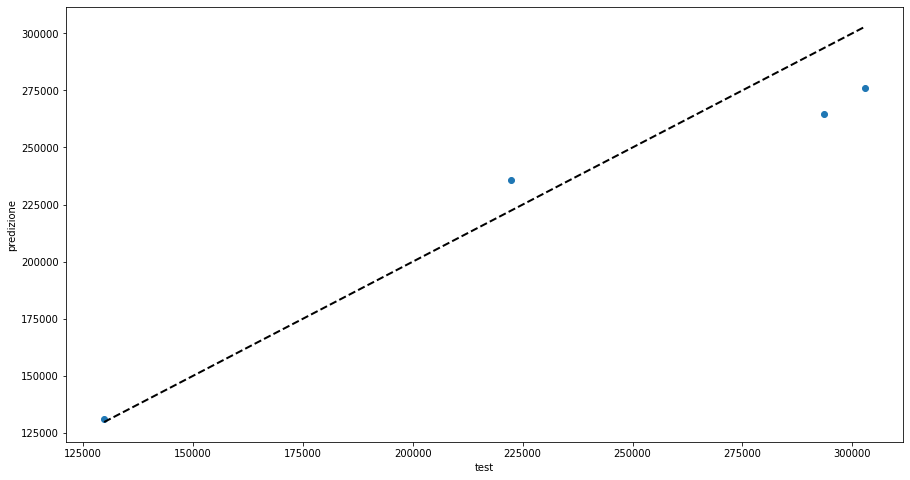

In [399]:
# see how the model behaved

plt.figure(figsize = (15,8))

plt.xlabel('test')
plt.ylabel('predizione')
plt.scatter(y_test, p_test)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 'k--', lw=2)
plt.show()

In [400]:
X.tail()

,0,1,3,4
12,1.0,2018.0,-3.68,66.0
13,1.0,2019.0,5.51,66.0
14,1.0,2020.0,0.00,66.0
15,1.0,2021.0,0.00,64.0
16,1.0,2022.0,0.29,61.0


In [401]:
# initialize a new variable called row with the data for 2022; 
# this variable will be used by the model to 2023 prediction
row = np.array([1.0, 2022.0, 0.293569, 61.0]).reshape(-1,4)

In [402]:
#
predict_2023 = model.predict(row)

In [403]:
#Forecast for 2023 according to the model
predict_2023

array([148414.50935812])

In [404]:
# view the graph with the historical data and the new forecast with Plotly

import plotly.graph_objs as go


In [405]:
#historical data

years = X[1]
data = y

In [406]:
# Prediction

pred_year = [2023]
pred_data = predict_2023


In [407]:
#Create plots for historical and prediction data
#
trace1 = go.Scatter(
    x=years,
    y=data,
    mode='lines',
    name='Dati storici',
    marker=dict(color='blue')
)

In [408]:
#Plot the prediction
trace2 = go.Scatter(
    x=pred_year,
    y=pred_data,
    mode='markers',
    name='Previsione',
    marker=dict(color='red')
)

In [409]:
#Create the alignment for the connecting line
trace3 = go.Scatter(
    x=[years.loc[16], pred_year[0]],
    y=[data.loc[16], pred_data[0]],
    mode='lines',
    name='Connessione',
    marker=dict(color='red')
)

In [410]:
#plot the graph
data = [trace1, trace2, trace3]
layout = go.Layout(title='Nuoro Linear Regression Model Previsione 2023',
                   width = 800,
                   )
fig = go.Figure(data=data, layout=layout)


fig.show()